In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import MySQLdb
import time
import datetime
import warnings
warnings.filterwarnings("ignore")

In [168]:
result_df=pd.DataFrame()
for i in range(1,50):
    result_df=result_df.append({'up':0,'down':0},ignore_index=True)

In [171]:
db = MySQLdb.connect(host="127.0.0.1",user="sa",passwd="sasasa",db="quant",charset="utf8")
df = pd.read_csv('E:\jupyter\qushi-20190625-20190802.csv',index_col='index')
df_down = df[df.direction=='downdown']

for i in range(1,50):
    result=0
    result_rate=0
    raise_n=0
    decrease_n=0
    for stock_n, stock_k in df_down.iterrows():
        ts_code=stock_k.ts_code
        trade_time=stock_k.trade_time
        trade_price=stock_k.trade_price
        high=trade_price*(1+0.01*i)
        low=trade_price*(1-0.005*i)
        cursor = db.cursor()
        sql = "select * from stock_min where ts_code='"+ts_code+"' and trade_time>'"+trade_time+"' and (close<"+str(low)+" or close>"+str(high)+") order by trade_time limit 1"
        #print(sql)
        df_dr = pd.read_sql(sql,db)
        cursor.close()
        if df_dr.shape[0]>0:
            touch_time=df_dr.ix[0:1,'trade_time'][0]
            touch_price=df_dr.ix[0:1,'close'][0]
            spread=touch_price-trade_price
            if spread>0:
                raise_n+=1                
                result_rate+=0.01*i
            else:
                decrease_n+=1
                result_rate-=0.005*i
            result+=spread
    print(i,round(result,2),round(result_rate,2),raise_n+decrease_n)
    result_df.loc[i-1,['down']]=round(result_rate,2)

db.close()

1 -2.57 -0.16 35
2 -2.59 -0.2 35
3 -2.72 -0.12 35
4 -0.35 -0.04 35
5 -0.29 0.03 35
6 -3.31 0.21 35
7 -2.65 0.25 35
8 -5.11 0.04 35
9 -10.34 -0.22 35
10 -11.51 -0.4 35
11 -12.29 -0.55 34
12 -9.89 -0.42 34
13 -8.52 -0.32 32
14 -9.44 -0.35 32
15 -7.0 -0.15 32
16 -9.27 -0.32 31
17 -4.03 0.17 31
18 -7.95 -0.09 31
19 -10.5 -0.28 30
20 -13.46 -0.6 30
21 -13.48 -0.52 29
22 -11.2 -0.33 27
23 -10.52 -0.46 25
24 -13.36 -0.72 24
25 -13.82 -0.75 24
26 -12.83 -0.78 24
27 -11.86 -0.68 23
28 5.64 0.28 22
29 3.85 0.15 20
30 6.44 0.3 19
31 7.28 0.47 18
32 9.89 0.32 16
33 11.96 0.5 15
34 8.78 0.34 13
35 8.75 0.35 13
36 8.64 0.36 13
37 8.49 0.37 13
38 9.06 0.38 13
39 16.09 0.58 12
40 16.41 0.6 12
41 17.67 0.61 12
42 17.77 0.63 12
43 18.64 0.86 11
44 18.78 0.88 11
45 23.13 1.35 9
46 25.31 1.61 8
47 26.31 1.65 8
48 15.62 1.2 7
49 12.83 0.73 6


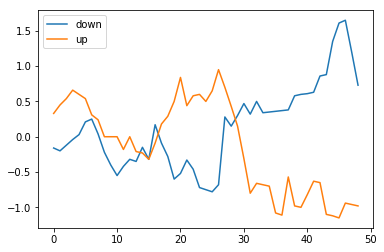

In [172]:
result_df.plot()